# Extracting Spectra of Sources

In [1]:
# import libraries required
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('image', cmap='viridis', interpolation='none', origin='lower') # setting colour map and no interpolation

import numpy as np
import scarlet
from scarlet.display import AsinhMapping

In [2]:
# Enter the DESJ ID of the object
desj_id = input('Please Enter the DESJ ID of the object: ')

# Convert the DESJ ID into the corresponding AGEL ID
agel_id = 'AGEL' + str(int(np.round(float(desj_id[4:15]))))\
    + str(int(np.round(float(desj_id[15:]))))
print('DESJ ID: ' + desj_id)
print('AGEL ID: ' + agel_id)

DESJ ID: DESJ233551.8640-515217.7600
AGEL ID: AGEL233552-515218


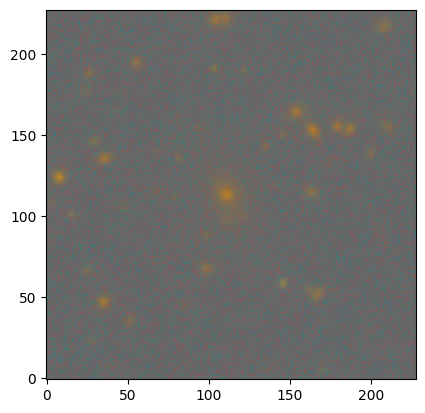

In [3]:
# Extracting data from NPZ file
data = np.load(agel_id + '/' + agel_id + '_ALL.npz')
images = data["images"]
filters = data["filters"]
centres = [(src['y_pix'], src['x_pix']) for src in data["catalogue"]]
weights = data["weights"]
psf = data["psfs"]

# Load image
stretch = 0.1
Q = 100
norm = AsinhMapping(minimum=images.min(), stretch=stretch, Q=Q)

img_rgb = scarlet.display.img_to_rgb(images, norm=norm)
plt.imshow(img_rgb)
plt.show()

In [4]:
model_psf = scarlet.GaussianPSF(sigma=(0.8)*len(filters))
model_frame = scarlet.Frame(images.shape, psf=model_psf, channels=filters)

observation = scarlet.Observation(images,
                                  psf=scarlet.ImagePSF(psf),
                                  weights=weights,
                                  channels=filters)
observation = observation.match(model_frame)